# Sprint Challenge
## *Data Science Sprint 13*

After a sprint of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). The data is sampled for you to something more manageable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge.

## Challenge Objectives
Successfully complete all these objectives to earn full credit.

**Successful completion is defined as passing all the unit tests in each objective.**  

There are 8 total possible points in this sprint challenge.


There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on Yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

____

# Before you submit your notebook you must first

1) Restart your notebook's Kernel

2) Run all cells sequentially, from top to bottom, so that cell numbers are sequential numbers (i.e. 1,2,3,4,5...)
- Easiest way to do this is to click on the **Cell** tab at the top of your notebook and select **Run All** from the drop down menu.

3) **Comment out the cell that generates a pyLDAvis visual in objective 4 (see instructions in that section).**
____

### Part 0: Import Necessary Packages
For this section, you will need to import:
- `spacy`
- `Pandas`
- `Seaborn`
- `Matplotlib`
- `NearestNeighbors`
- `Pipeline`
- `TfidfVectorizer`
- `KneighborsClassifier`
- `GridSearchCV`
- `corpora`
- `LdaModel`
- `gensim`
- `re`

> **Note: This assignment is optimized to work with these specific packages. You can use import different packages, but note that this may affect how CodeGrade works, and may cause CodeGrade to fail.**

In [1]:
import spacy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from gensim import corpora
from gensim.models.ldamodel import LdaModel
import re

In [2]:
# Visible Testing
assert pd.__package__ == 'pandas'




### Part 0: Import Data

In [3]:


# Load reviews from URL
data_url = 'https://raw.githubusercontent.com/bloominstituteoftechnology/data-science-practice-datasets/main/unit_4/unit1_nlp/review_sample.json'

# Import data into a DataFrame named df
df = pd.read_json(data_url, lines=True)
df.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


In [4]:
# Visible Testing
assert isinstance(df, pd.DataFrame), 'df is not a DataFrame. Did you import the data into df?'
assert df.shape[0] == 10000, 'DataFrame df has the wrong number of rows.'

## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- Accept one document at a time
- Return a list of tokens

You are free to use any method you have learned this week.

**TO PASS CODEGRADE RUNTIME:**
- Do not run your tokenize function more than one time in your notebook! It is not needed until Part 4!

In [5]:
# Optional: Consider using spaCy in your function. The spaCy library can be imported by running this cell.
# A pre-trained model (en_core_web_sm) has been made available to you in the CodeGrade container.
# If you DON'T need use the en_core_web_sm model, you can comment it out below.

nlp = spacy.load('en_core_web_sm')

In [6]:
def tokenize(doc):

    processed_doc = nlp(doc.lower())

    tokens = [token.lemma_ for token in processed_doc if not token.is_stop and not token.is_punct]

    return tokens


In [7]:
'''Testing'''
assert isinstance(tokenize(df.sample(n=1)["text"].iloc[0]), list), "Make sure your tokenizer function accepts a single document and returns a list of tokens!"

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews (i.e. create a doc-term matrix).
    * Name that doc-term matrix `dtm`

In [8]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
dtm = vectorizer.fit_transform(df['text'])
print(f"Document-Term Matrix Shape: {dtm.shape}")


Document-Term Matrix Shape: (10000, 27588)
CPU times: user 953 ms, sys: 20 ms, total: 973 ms
Wall time: 993 ms



2. Write a fake review. Assign the text of the review to an object called `fake_review`.
3. Query the fake review for the 10 most similar reviews, print the text of the reviews.
    - Given the size of the dataset, use `NearestNeighbors` model for this. Name the model `nn`.

In [9]:
# Create and fit a NearestNeighbors model named "nn"
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=10)
nn.fit(dtm)

NearestNeighbors(n_neighbors=10)

In [10]:
'''Testing.'''
assert nn.__module__ == 'sklearn.neighbors._unsupervised', ' nn is not a NearestNeighbors instance.'
assert nn.n_neighbors == 10, 'nn has the wrong value for n_neighbors'

In [11]:
# Create a fake review and find the 10 most similar reviews
fake_review = "The food was amazing, and the staff provided excellent service. Highly recommend this place!"

fake_review_vector = vectorizer.transform([fake_review])

distances, indices = nn.kneighbors(fake_review_vector)

similar_reviews = df.iloc[indices[0]]['text']
print("Fake Review:")
print(fake_review)
print("\nMost Similar Reviews:")
print(similar_reviews)

Fake Review:
The food was amazing, and the staff provided excellent service. Highly recommend this place!

Most Similar Reviews:
9465    This place has excellent service and they work...
8713    Perfect little spot for a bite to eat!!! Food ...
4582    Absolutely amazing. I highly recommend anyone ...
6127    All the times i have been here this place is s...
3127    Just amazing , the food was very good. The che...
9898         Very yummy! Food and service were excellent!
650     This place is amazing! The food is excellent! ...
1175    great thai food and excellent customer service...
2256    Excellent service, beautiful atmosphere, and t...
4105    Honestly one of the best BBQ places I've ever ...
Name: text, dtype: object


In [12]:
# Visible Testing
assert isinstance(fake_review, str), "Did you write a review in the correct data type?"

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset.

1. Create a pipeline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier.
    - Use that pipeline to train a model to predict the `stars` feature (i.e. the labels).
    - Use that pipeline to predict a star rating for your fake review from Part 2.



2. Create a parameter dict including `one parameter for the vectorizer` and `one parameter for the model`.
    - Include 2 possible values for each parameter
        - **Keep the values for each parameter low. Extreme values will compromise runtime**
    - **Use `n_jobs` = 1**
    - Due to limited computational resources on CodeGrader `DO NOT INCLUDE ADDITIONAL PARAMETERS OR VALUES PLEASE.`
    
    
3. Train the entire pipeline with a GridSearch
    - Name your GridSearch object as `gs`

In [15]:
from sklearn.linear_model import LogisticRegression

# pipeline object
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', LogisticRegression(max_iter=500))
])

# Simplify
param_grid = {
    'vectorizer__max_df': [0.8],
    'classifier__C': [1.0]
}

# The GridSearchCV object
gs = GridSearchCV(pipeline, param_grid, n_jobs=1, cv=3)
gs.fit(df['text'], df['stars'])

# Predict the star rating
fake_review_prediction = gs.predict([fake_review])[0]
print(f"Predicted Star Rating for the Fake Review: {fake_review_prediction}")

Predicted Star Rating for the Fake Review: 5


In [16]:
# Visible Testing
prediction = gs.predict(["This is your prediction statement."])[0]
assert prediction in df.stars.values, 'You gs object should be able to accept raw text within a list. Did you include a vectorizer in your pipeline?'

## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
    - Set num_topics to `5`
    - Name your LDA model `lda`
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations.
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

When you instantiate your LDA model, it should look like this:

```python
lda = LdaModel(corpus=corpus,
               id2word=id2word,
               random_state=723812,
               num_topics = num_topics,
               passes=1
              )

```

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

## Note about  pyLDAvis

**pyLDAvis** is the Topic modeling package that we used in class to visualize the topics that LDA generates for us.

You are welcomed to use pyLDAvis if you'd like for your visualization. However, **you MUST comment out the code that imports the package and the cell that generates the visualization before you submit your notebook to CodeGrade.**

Although you should leave the print out of the visualization for graders to see (i.e. comment out the cell after you run it to create the viz).

### 1. Estimate a LDA topic model of the review text

* Use the `tokenize` function you created earlier to create tokens.
* Create an `id2word` object.
> Hint: Use `corpora.Dictionary`
* Create a `corpus` object.
> Hint: Use `id2word.doc2bow`
* Instantiate an `lda` model.

>> Remember to read the LDA docs for more information on the various class attributes and methods available to you in the LDA model: https://radimrehurek.com/gensim/models/ldamodel.html

In [17]:
# Do not change this value
num_topics = 5

In [26]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel

# Tokenize
df['tokens'] = df['text'].apply(tokenize)

#  id2word dictionary
id2word = corpora.Dictionary(df['tokens'])

# corpus object
corpus = [id2word.doc2bow(tokens) for tokens in df['tokens']]

lda = LdaModel(corpus=corpus,
               id2word=id2word,
               random_state=723812,
               num_topics=num_topics,
               passes=5
              )

#### Testing

In [27]:
# Visible Testing

assert lda.get_topics().shape[0] == 5, 'Did your model complete its training? Did you set num_topics to 5?'

#### 2. Create 2 visualizations of the results:
1. Create a visualization using pyLDAvis. Run the cell, then comment out your code before submission, leaving the visualization in the cell.

2. Create a visualization using the matplotlib library and utilizing the subplots function. Assign this visualization to a variable called `visual_plot`.


In [30]:
# !pip install pyLDAvis
# import pyLDAvis
# import pyLDAvis.gensim_models as gensimvis

# pyLDAvis.enable_notebook()  # Use this in Jupyter or Colab
# vis = gensimvis.prepare(lda, corpus, id2word)
# pyLDAvis.display(vis)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 32.5 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


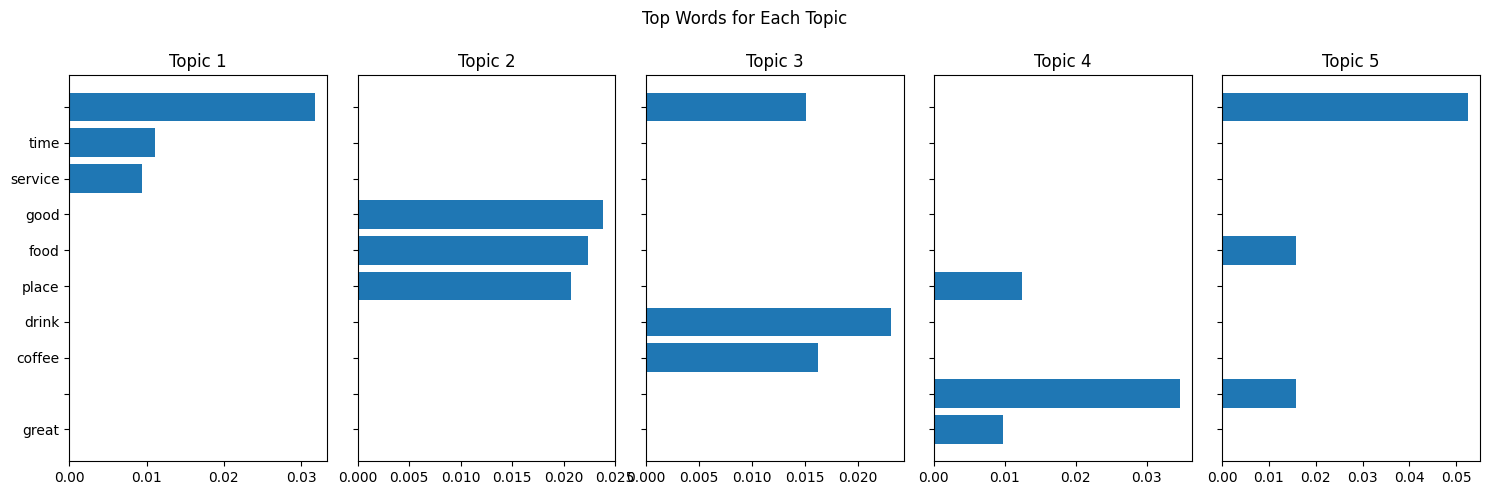

In [31]:
import matplotlib.pyplot as plt

# Get the topics and top words
topics = lda.show_topics(num_topics=num_topics, num_words=3, formatted=False)

# Create subplots
fig, axes = plt.subplots(1, num_topics, figsize=(15, 5), sharey=True)

for i, (topic_id, topic) in enumerate(topics):
    words, probs = zip(*topic)
    axes[i].barh(words, probs)
    axes[i].set_title(f"Topic {topic_id+1}")
    axes[i].invert_yaxis()

fig.suptitle("Top Words for Each Topic")
plt.tight_layout()
plt.subplots_adjust(top=0.85)
visual_plot = fig  # Assign the figure to visual_plot
plt.show()

In [32]:
# Visible testing
assert visual_plot is not None, "Variable 'visual_plot' is not created."

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
